In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [10]:
# Load the image
def load_image(image_path):
    image = Image.open(image_path)
    return image

In [15]:
# Apply vertical edge detection filter
def apply_vertical_edge_filter(image):
    # Convert image to RGB and extract pixel values
    image = image.convert('RGB')
    pixels = np.array(image)
    
    # Define the vertical edge detection kernel
    vertical_kernel = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    
    # Initialize the output array for edges
    edges = np.zeros_like(pixels, dtype=np.float32)
    
    # Iterate over RGB channels
    for channel in range(3):  # RGB has 3 channels
        # Convolve each channel
        edges[..., channel] = convolve2d(pixels[..., channel], vertical_kernel)
    
    # Normalize and clip pixel values to 0-255
    edges = np.clip(edges, 0, 255).astype(np.uint8)
    
    return Image.fromarray(edges)


In [12]:
# Perform convolution for 2D arrays
def convolve2d(image_channel, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2
    padded_channel = np.pad(image_channel, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    output = np.zeros_like(image_channel, dtype=np.float32)
    
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            # Element-wise multiplication and summation
            region = padded_channel[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [ ]:
# Main function
def main():
    image_path = "Ganesh.jpg"  # Path to the input image
    image = load_image(image_path)
    
    # Apply the vertical edge filter
    edges = apply_vertical_edge_filter(image)
    
    # Display the original image and edges
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Vertical Edges")
    plt.imshow(edges)
    plt.axis("off")
    plt.show()


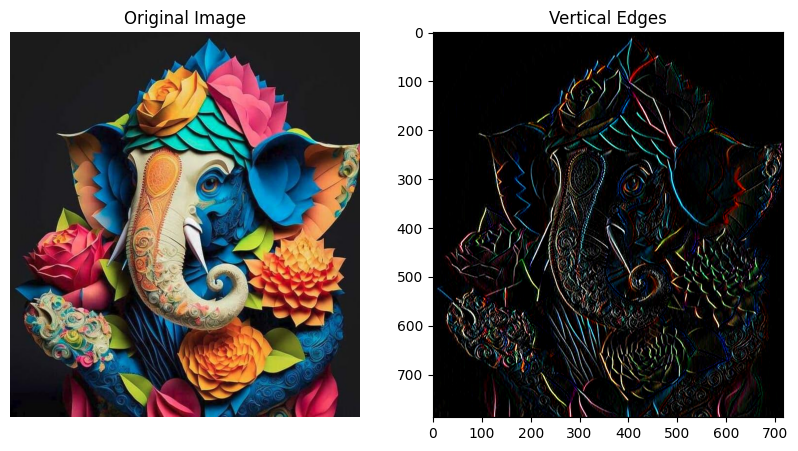

In [18]:

if __name__ == "__main__":
    main()